In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/artist_data_demo_lyrics.csv')
df

,artist,title,album,date,lyrics
0,Coldplay,The Scientist,A Rush of Blood to the Head,26/08/2002,come up to meet you tell you i'm sorry you don...
1,Coldplay,Viva la Vida,Viva La Vida or Death and All His Friends,25/05/2008,i used to rule the world seas would rise when ...
2,Coldplay,Fix You,X&Y,06/06/2005,when you try your best but you don't succeed w...
3,Coldplay,Yellow,Parachutes,26/06/2000,look at the stars look how they shine for you ...
4,Coldplay,Hymn for the Weekend,A Head Full of Dreams,25/01/2016,from me drink from me oh-ah-oh-ah then we shoo...
...,...,...,...,...,...
245,Beyoncé,Party,4,30/08/2011,i may be young but i'm ready to give you all m...
246,Beyoncé,Back to Black,The Great Gatsby: Music from Baz Luhrmann’s Fi...,06/05/2013,with andre 3000 originally by amy winehouse ve...
247,Beyoncé,Die With You,NaN,04/04/2015,i don't have a reason to cry and i have every ...
248,Beyoncé,Run the World (Girls),4,21/04/2011,girls we run this mother yeah girls we run thi...


In [3]:
def lyrics_metrics(df, column):
    '''
    Function to count lyrics word length, unique length 
    and unique index (number of unique lyrics divided by total lyrics)
    '''
    # Split lyrics string in to list of strings
    split = df[column].str.split()
    # Add new column counting number of strings (words) in list
    df[column + '_count'] = split.str.len()

    # Find number of unique lyrics
    unique_lyrics_len = []
    
    for i in split:
        unique = np.unique(i)
        unique_length = len(unique)
        unique_lyrics_len.append(unique_length)

    df[column+'_unique_count'] = unique_lyrics_len

    # Unique ratio for each song
    unique_ratio = df[column+'_unique_count'] / df[column + '_count']
    df['unique_ratio'] = unique_ratio.round(3)

    # Drop rows where there are less than 10 words in total

    df = df[df['lyrics_count'] >= 10]
    
    return df

In [4]:
def stats_report(df, column):
    '''
    Simple stats on artists lyrics
    '''

    stats_obj = df.groupby('artist')[column]

    lyrics_count = stats_obj.count()
    means =  stats_obj.mean().round(2)
    stdevs = stats_obj.std().round(2)
    min_len = stats_obj.min()
    max_len = stats_obj.max()
    uniqueness = df.groupby('artist')['unique_ratio'].mean().round(2)

    stats_df = pd.concat([lyrics_count,
                          min_len,
                          max_len,
                          means,
                          stdevs,
                          uniqueness], axis=1)

    stats_df.columns = ['song count',
                        'min',
                        'max',
                        'mean',
                        'stdev',
                        'uniqueness']
    
    print(stats_df)

In [5]:
df = lyrics_metrics(df, 'lyrics')

In [6]:
df.describe()

,lyrics_count,lyrics_unique_count,unique_ratio
count,227.000000,227.000000,227.000000
mean,386.444934,141.052863,0.389903
std,251.719943,87.465932,0.105703
min,38.000000,30.000000,0.149000
25%,198.000000,82.000000,0.313000
50%,328.000000,116.000000,0.381000
75%,517.500000,162.500000,0.451000
max,2153.000000,649.000000,0.895000


In [6]:
lyric = df.loc[df['title'] == str('Dance for You')].lyrics.item()

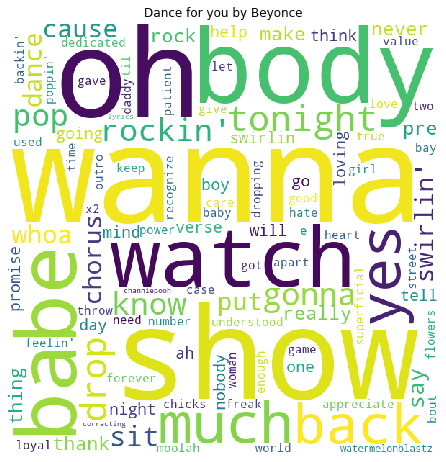

In [7]:
make_wordcloud(lyric, 'Dance for you', 'Beyonce')

In [7]:
len(df)

227

In [51]:
def most_common(df, column):
    temp = []
    for i in df[column]:
        top_word = pd.Series(i.split()).value_counts()[:1].to_dict()
        temp.append(top_word)
      
    top_lyric = []
    top_lyric_count = []
    
    for i in temp:
        top_lyric.append(list(i.keys())[0])
        top_lyric_count.append(list(i.values())[0])
    
    df['most_common_lyric'] = top_lyric
    df['most_common_count'] = top_lyric_count
    
    return df

In [52]:
df = most_common(df, 'lyrics')

<ipython-input-51-bf67a1de13d4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['most_common_lyric'] = top_lyric
<ipython-input-51-bf67a1de13d4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['most_common_count'] = top_lyric_count


str